In [2]:
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from pathlib import Path

In [3]:
confirm = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recover = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

FileNotFoundError: [Errno 2] File b'Documents/GitHub/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv' does not exist: b'Documents/GitHub/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [3]:
confirm.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,120,170,174,237,273,281,299,349,367,423
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,212,223,243,259,277,304,333,361,377,383
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,511,584,716,847,986,1171,1251,1320,1423,1468
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,334,370,376,390,428,439,466,501,525,545
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,7,7,7,8,8,8,10,14,16,17


In [4]:
deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,NaN,Afghanistan,33.00000,65.000000,0,0,0,0,0,0,...,4,4,4,4,6,6,7,7,11,14
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,10,11,15,15,16,17,20,20,21,22
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,31,35,44,58,86,105,130,152,173,193
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,6,8,12,14,15,16,17,18,21,22
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Falkland Islands (Malvinas),United Kingdom,-51.79630,-59.523600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
259,Saint Pierre and Miquelon,France,46.88520,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260,NaN,South Sudan,6.87700,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,NaN,Western Sahara,24.21550,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
recover.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2,2,5,5,10,10,10,15,18,18
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,33,44,52,67,76,89,99,104,116,131
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,31,37,46,61,61,62,90,90,90,113
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,10,10,10,10,16,21,26,31,39
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,1,1,1,1,2,2,2,2


In [6]:
# Korea
# Italy
# US
# China



# Deaths

In [7]:
# Grouping data according to Country
deaths_country = deaths.groupby('Country/Region', as_index=False).sum()
deaths_country

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,4,4,4,4,6,6,7,7,11,14
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,10,11,15,15,16,17,20,20,21,22
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,31,35,44,58,86,105,130,152,173,193
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,6,8,12,14,15,16,17,18,21,22
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,Vietnam,16.0000,108.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180,West Bank and Gaza,31.9522,35.2332,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
181,Western Sahara,24.2155,-12.8858,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
182,Zambia,-15.4167,28.2833,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1


In [8]:
deaths_country[deaths_country['Country/Region'] == "China"]

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
36,China,1083.3367,3684.4197,17,18,26,42,56,82,131,...,3304,3308,3309,3316,3322,3326,3330,3333,3335,3335


In [9]:
countries = ['US', 'China', 'Korea, South', 'Italy', 'Spain']

lst_countries = []

# Extracting the data of the list of countries
for i in countries:
    x = deaths_country.loc[deaths_country['Country/Region'] == i]
    lst_countries.append(x)

In [10]:
# Combining the death data from these countries
df_4countries = pd.concat(lst_countries).drop(columns=['Lat', 'Long'])
df_4countries

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
171,US,0,0,0,0,0,0,0,0,0,...,2467,2978,3873,4757,5926,7087,8407,9619,10783,12722
36,China,17,18,26,42,56,82,131,133,171,...,3304,3308,3309,3316,3322,3326,3330,3333,3335,3335
90,"Korea, South",0,0,0,0,0,0,0,0,0,...,152,158,162,165,169,174,177,183,186,192
84,Italy,0,0,0,0,0,0,0,0,0,...,10779,11591,12428,13155,13915,14681,15362,15887,16523,17127
156,Spain,0,0,0,0,0,0,0,0,0,...,6803,7716,8464,9387,10348,11198,11947,12641,13341,14045


In [11]:
# Transposing data
df_4countries_T = df_4countries.transpose()
df_4countries_T.columns = df_4countries_T.iloc[0]
df_4countries_T = df_4countries_T.drop(df_4countries_T.index[0])

In [12]:
df_4countries_T = df_4countries_T.reset_index().rename(columns={"index": "Date"})

In [13]:
# countries = ['US', 'China', 'Korea, South', 'Italy']

for i in countries:
    df_4countries_T[i] = df_4countries_T[i].astype(int)

In [14]:
# Converting to Date and Time
df_4countries_T['Date TimeStamp'] = pd.to_datetime(df_4countries_T['Date'])

In [15]:
df_4countries_T['Date TimeStamp']

0    2020-01-22
1    2020-01-23
2    2020-01-24
3    2020-01-25
4    2020-01-26
        ...    
72   2020-04-03
73   2020-04-04
74   2020-04-05
75   2020-04-06
76   2020-04-07
Name: Date TimeStamp, Length: 77, dtype: datetime64[ns]

In [16]:
df_4countries_T

Country/Region,Date,US,China,"Korea, South",Italy,Spain,Date TimeStamp
0,1/22/20,0,17,0,0,0,2020-01-22
1,1/23/20,0,18,0,0,0,2020-01-23
2,1/24/20,0,26,0,0,0,2020-01-24
3,1/25/20,0,42,0,0,0,2020-01-25
4,1/26/20,0,56,0,0,0,2020-01-26
...,...,...,...,...,...,...,...
72,4/3/20,7087,3326,174,14681,11198,2020-04-03
73,4/4/20,8407,3330,177,15362,11947,2020-04-04
74,4/5/20,9619,3333,183,15887,12641,2020-04-05
75,4/6/20,10783,3335,186,16523,13341,2020-04-06


/Users/clairedmedina/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Total Number of Deaths in US, China, South Korea, and Italy')

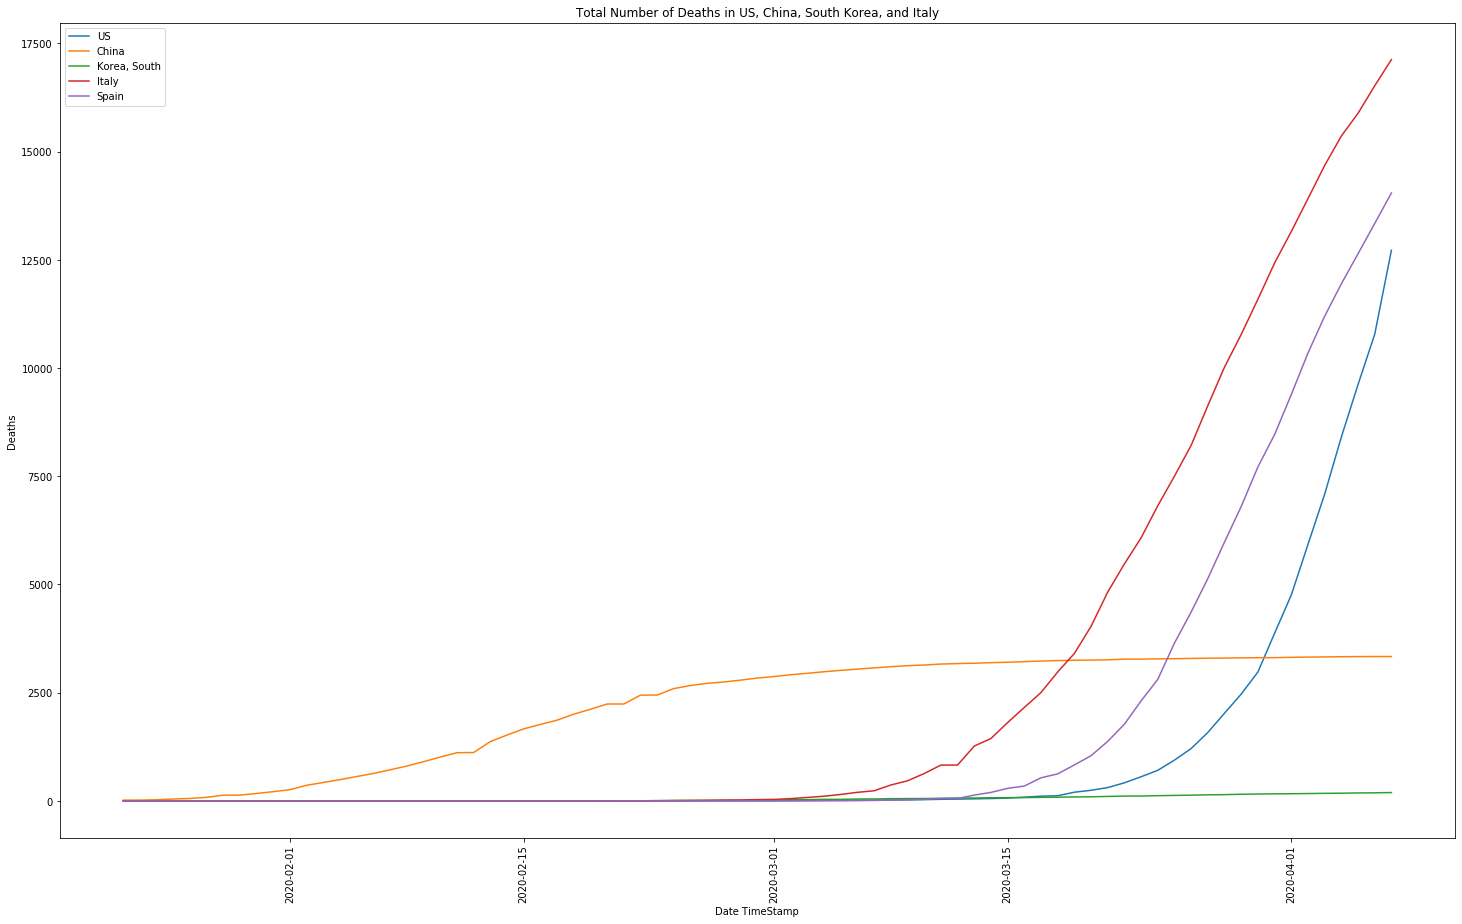

In [17]:
# Plotting Data
plt.figure(figsize=(25,15))

for i in countries:
    sns.lineplot(data=df_4countries_T, x = 'Date TimeStamp', y = i, label= i)

plt.ylabel('Deaths')
plt.xticks(rotation = 90)
plt.legend()
plt.title('Total Number of Deaths in US, China, South Korea, and Italy')

# Confirmed

In [18]:
# Grouping data according to Country
confirm_country = confirm.groupby('Country/Region', as_index=False).sum()
confirm_country

# countries = ['US', 'China', 'Korea, South', 'Italy']

lst_countries = []

# Extracting the data of the list of countries
for i in countries:
    x = confirm_country.loc[confirm_country['Country/Region'] == i]
    lst_countries.append(x)

# Combining the confirm data from these countries
df_4countries = pd.concat(lst_countries).drop(columns=['Lat', 'Long'])

# Transposing data
df_4countries_T = df_4countries.transpose()
df_4countries_T.columns = df_4countries_T.iloc[0]
df_4countries_T = df_4countries_T.drop(df_4countries_T.index[0])

df_4countries_T = df_4countries_T.reset_index().rename(columns={"index": "Date"})

# Converting Object Type to Integer Type
for i in countries:
    df_4countries_T[i] = df_4countries_T[i].astype(int)
    
# Converting to Date and Time
df_4countries_T['Date TimeStamp'] = pd.to_datetime(df_4countries_T['Date'])

Text(0.5, 1.0, 'Total Number of Confirmed Cases in US, China, South Korea, and Italy')

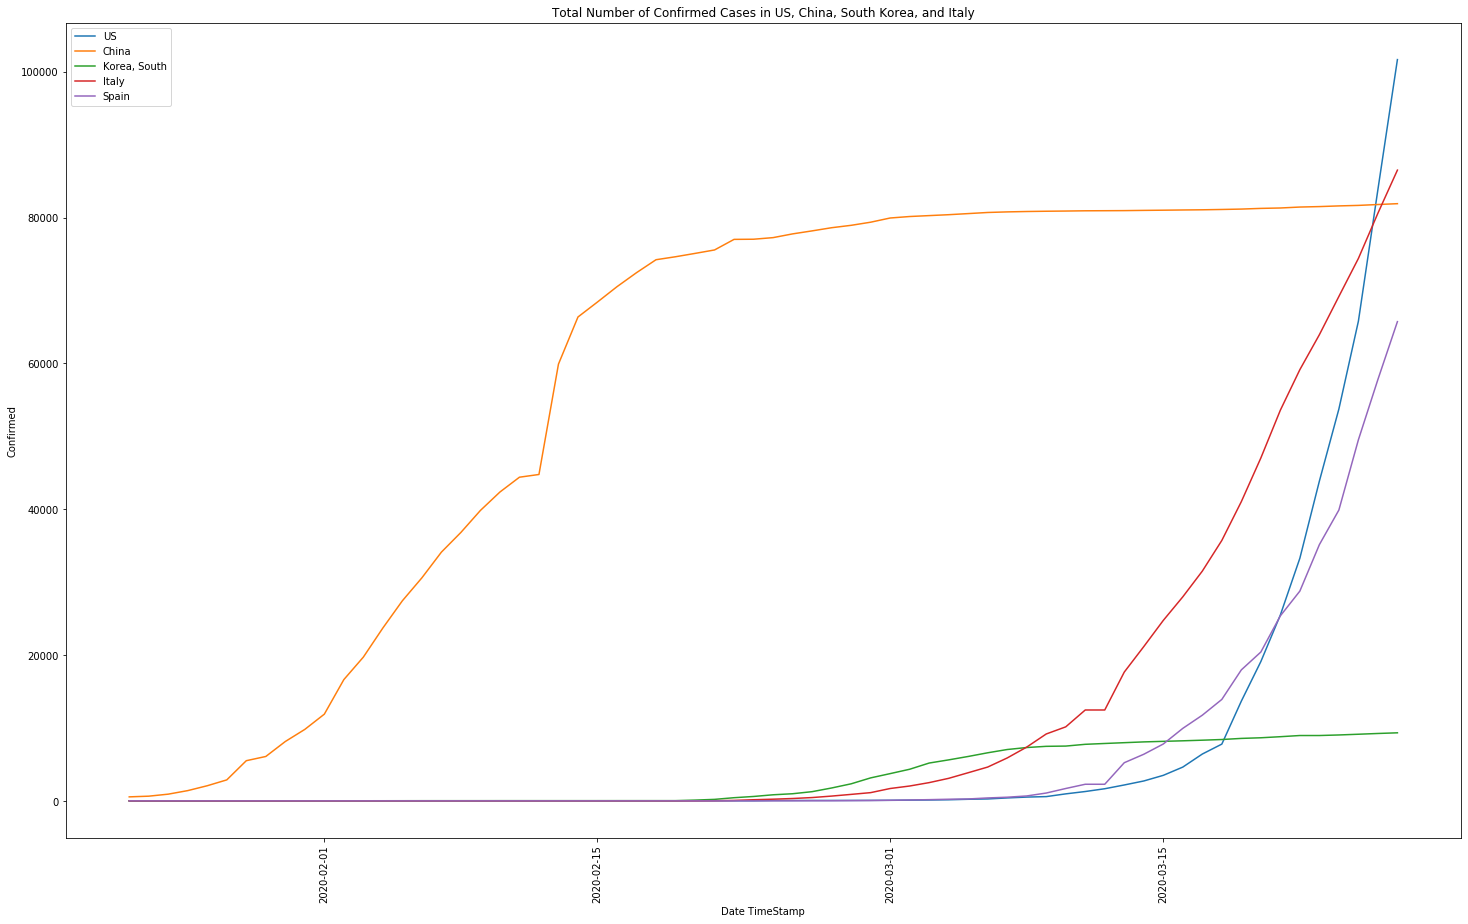

In [19]:
# Plotting Data
plt.figure(figsize=(25,15))

for i in countries:
    sns.lineplot(data=df_4countries_T, x = 'Date TimeStamp', y = i, label= i)

plt.ylabel('Confirmed')
plt.xticks(rotation = 90)
plt.legend()
plt.title('Total Number of Confirmed Cases in US, China, South Korea, and Italy')

# Recover

In [20]:
# Grouping data according to Country
recover_country = recover.groupby('Country/Region', as_index=False).sum()
recover_country

# countries = ['US', 'China', 'Korea, South', 'Italy']

lst_countries = []

# Extracting the data of the list of countries
for i in countries:
    x = recover_country.loc[recover_country['Country/Region'] == i]
    lst_countries.append(x)

# Combining the recover data from these countries
df_4countries = pd.concat(lst_countries).drop(columns=['Lat', 'Long'])
df_4countries

# Transposing data
df_4countries_T = df_4countries.transpose()
df_4countries_T.columns = df_4countries_T.iloc[0]
df_4countries_T = df_4countries_T.drop(df_4countries_T.index[0])

df_4countries_T = df_4countries_T.reset_index().rename(columns={"index": "Date"})

# Converting Object Type to Integer Type
for i in countries:
    df_4countries_T[i] = df_4countries_T[i].astype(int)
    
# Converting to Date and Time
df_4countries_T['Date TimeStamp'] = pd.to_datetime(df_4countries_T['Date'])

Text(0.5, 1.0, 'Total Number of Recovered Cases in US, China, South Korea, and Italy')

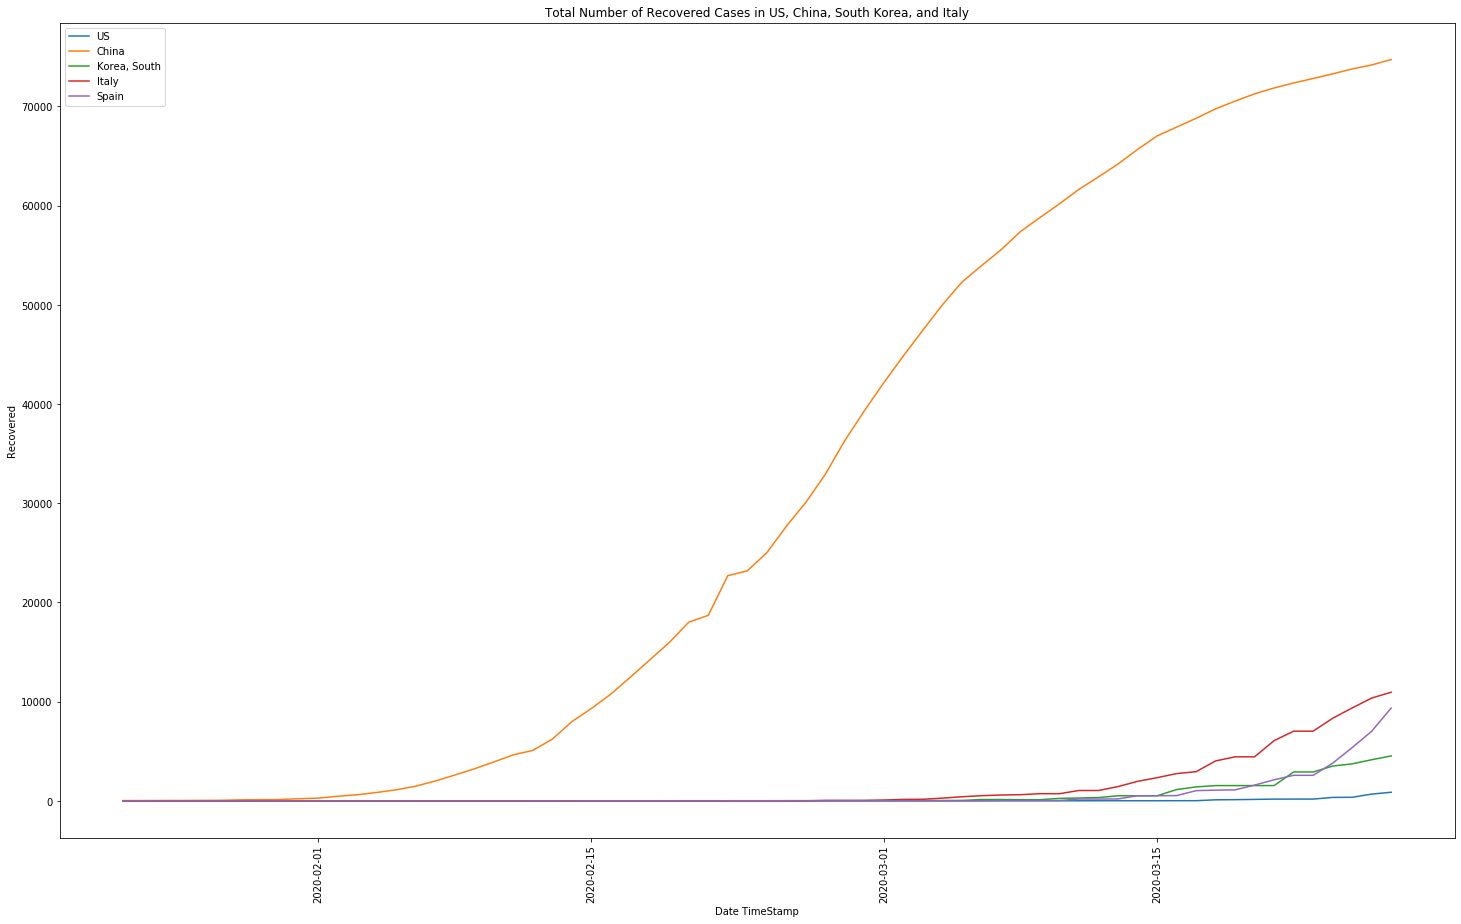

In [21]:
# Plotting Data
plt.figure(figsize=(25,15))

for i in countries:
    sns.lineplot(data=df_4countries_T, x = 'Date TimeStamp', y = i, label= i)

plt.ylabel('Recovered')
plt.xticks(rotation = 90)
plt.legend()
plt.title('Total Number of Recovered Cases in US, China, South Korea, and Italy')